## Data Ingestion and Wrangling

### Importing Modules

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import math
import shap

In [19]:
df = pd.read_csv(r'vn30f_hourly_cleaned.csv', index_col = 0)

In [20]:
df = df.set_index('time')

In [21]:
df = df[['open', 'close', 'high', 'low', 'volume']]

In [22]:
df = df.dropna(axis=0, how='any')

In [23]:
df.dtypes

open      float64
close     float64
high      float64
low       float64
volume    float64
dtype: object

### Getting price changes in previous periods

In [24]:
for i in range(1, 13):
    df['t' + str(i) + 'change'] = df['close'].pct_change(i)

### Getting technical indicators

There are several technical indicators groups in TA-Lib:
* Overlap Studies
* Momentum Indicators
* Volume Indicators
* Volatility Indicators
* Cycle Indicators
* Pattern Recognition

In [25]:
close, high, low, volume = df['close'], df['high'], df['low'], df['volume']

In [26]:
# Overlap Studies indicator
df['upperband'], df['middleband'], df['lowerband'] = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0) #Bollinger Bands
df['dema'] = talib.DEMA(close, timeperiod=30) #Double Exponential Moving Average
df['ema'] = talib.EMA(close, timeperiod=30) #Exponential Moving Average
df['ht_trendline'] = talib.HT_TRENDLINE(close) #Hilbert Transform - Instantaneous Trendline
df['kama'] = talib.KAMA(close, timeperiod=30) #Kaufman Adaptive Moving Average
df['ma'] = talib.MA(close, timeperiod=30, matype=0) #Moving Average
df['midpoint'] = talib.MIDPOINT(close, timeperiod=14) #MidPoint over period
df['midprice'] = talib.MIDPRICE(high, low, timeperiod=14) #Midpoint Price over period
df['sma'] = talib.SMA(close, timeperiod=30) #Simple Moving Average
df['t3'] = talib.T3(close, timeperiod=5, vfactor=0) #Triple Exponential Moving Average (T3)
df['tema'] = talib.TEMA(close, timeperiod=30) #Triple Exponential Moving Average
df['trima'] = talib.TRIMA(close, timeperiod=30) #Triangular Moving Average
df['wma'] = talib.WMA(close, timeperiod=30) #Weighted Moving Average

In [27]:
#Momentum Indicators
df['adx'] = talib.ADX(high, low, close, timeperiod=14) #Average Directional Movement Index
df['adxr'] = talib.ADXR(high, low, close, timeperiod=14) #Average Directional Movement Index Rating
df['apo'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0) #Absolute Price Oscillator
df['aroondown'], df['aroonup'] = talib.AROON(high, low, timeperiod=14) #Aroon
df['aroonosc'] = talib.AROONOSC(high, low, timeperiod=14) #Aroon Oscillator
df['bop'] = talib.BOP(df['open'], high, low, close) #Balance Of Power
df['cci'] = talib.CCI(high, low, close, timeperiod=14) #Commodity Channel Index
df['cmo'] = talib.CMO(close, timeperiod=14) #Chande Momentum Oscillator
df['dx'] = talib.DX(high, low, close, timeperiod=14) #Directional Movement Index
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #Moving Average Convergence/Divergence
df['mfi'] = talib.MFI(high, low, close, volume, timeperiod=14) #Money Flow Index
df['minus_di'] = talib.MINUS_DI(high, low, close, timeperiod=14) #Minus Directional Indicator
df['mom'] = talib.MOM(close, timeperiod=10) #Momentum
df['plus_di'] = talib.PLUS_DI(high, low, close, timeperiod=14) #Plus Directional Indicator
df['ppo'] = talib.PPO(close, fastperiod=12, slowperiod=26, matype=0) #Percentage Price Oscillator
df['roc'] = talib.ROC(close, timeperiod=10) #Rate of Change
df['rsi'] = talib.RSI(close, timeperiod=14) #Relative Strength Index
df['slowk'], df['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0) #Stochastic
df['fastk'], df['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0) #Stochastic Fast
df['fastk_rsi'], df['fastd_rsi'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0) #Stochastic Relative Strength Index
df['ultosc'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28) #Ultimate Oscillator
df['willr'] = talib.WILLR(high, low, close, timeperiod=14) #Williams' %R

In [28]:
# Volume Indicators
df['ad'] = talib.AD(high, low, close, volume) #Chaikin A/D Line
df['adosc'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10) #Chaikin A/D Oscillator
df['obv'] = talib.OBV(close, volume) #On Balance Volume

In [29]:
# Volatility Indicators
df['adr'] = talib.ATR(high, low, close, timeperiod=14)
df['natr'] = talib.NATR(high, low, close, timeperiod=14)
df['trange'] = talib.TRANGE(high, low, close)
returns = df['close'].pct_change()
df['volatility'] = returns.rolling(window=18*4).std()

In [30]:
# Cycle Indicators
df['ht_decperiod'] = talib.HT_DCPERIOD(close)
df['ht_dcphase'] = talib.HT_DCPHASE(close)
df['inphase'], df['quadrature'] = talib.HT_PHASOR(close)
df['sine'], df['leadsine'] = talib.HT_SINE(close)
df['integer'] = talib.HT_TRENDMODE(close)

In [31]:
df = df.dropna(axis=0, how='any')

In [32]:
df.describe()

,open,close,high,low,volume,t1change,t2change,t3change,t4change,t5change,...,natr,trange,volatility,ht_decperiod,ht_dcphase,inphase,quadrature,sine,leadsine,integer
count,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,...,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000,5541.000000
mean,1070.040300,1070.028334,1070.408320,1069.664321,38497.382602,0.000052,0.000105,0.000159,0.000214,0.000267,...,0.495391,5.190652,0.006473,22.482034,129.290778,0.251499,0.078768,-0.042679,-0.102841,0.607111
std,237.383342,237.368237,237.464622,237.287688,28365.260646,0.007256,0.010610,0.013210,0.015429,0.017160,...,0.281015,5.798754,0.003313,5.162751,99.321925,13.874531,21.841087,0.580694,0.738510,0.488437
min,573.600000,574.500000,574.700000,573.500000,668.000000,-0.057452,-0.075410,-0.078603,-0.091015,-0.101907,...,0.086377,0.000000,0.001380,12.102677,-44.989820,-85.817993,-119.976043,-0.999999,-1.000000,0.000000
25%,886.000000,885.900000,886.200000,885.800000,18894.000000,-0.002513,-0.004002,-0.005422,-0.006410,-0.007176,...,0.290937,1.500000,0.003894,18.703808,28.156402,-5.466200,-9.116191,-0.512528,-0.824373,0.000000
50%,1007.200000,1007.400000,1008.000000,1007.000000,31495.000000,0.000094,0.000227,0.000584,0.000713,0.000987,...,0.408556,3.300000,0.005449,21.584450,159.768424,0.798731,-0.563003,-0.068174,-0.281851,1.000000
75%,1230.300000,1230.400000,1230.600000,1229.900000,50949.000000,0.003116,0.004992,0.006491,0.007839,0.008730,...,0.616675,6.700000,0.008205,25.547741,204.468660,6.794571,8.097021,0.413957,0.673348,1.000000
max,1572.700000,1572.200000,1572.800000,1571.900000,187676.000000,0.046956,0.079029,0.088922,0.103647,0.099735,...,1.884217,59.000000,0.019277,44.944129,314.968492,71.012613,209.435266,1.000000,1.000000,1.000000


In [33]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 't1change', 't2change',
       't3change', 't4change', 't5change', 't6change', 't7change', 't8change',
       't9change', 't10change', 't11change', 't12change', 'upperband',
       'middleband', 'lowerband', 'dema', 'ema', 'ht_trendline', 'kama', 'ma',
       'midpoint', 'midprice', 'sma', 't3', 'tema', 'trima', 'wma', 'adx',
       'adxr', 'apo', 'aroondown', 'aroonup', 'aroonosc', 'bop', 'cci', 'cmo',
       'dx', 'macd', 'macdsignal', 'macdhist', 'mfi', 'minus_di', 'mom',
       'plus_di', 'ppo', 'roc', 'rsi', 'slowk', 'slowd', 'fastk', 'fastd',
       'fastk_rsi', 'fastd_rsi', 'ultosc', 'willr', 'ad', 'adosc', 'obv',
       'adr', 'natr', 'trange', 'volatility', 'ht_decperiod', 'ht_dcphase',
       'inphase', 'quadrature', 'sine', 'leadsine', 'integer'],
      dtype='object')

### Creating a y target

In [34]:
df['price_change'] = df['close'].diff()

# Encode 0 for price decrease and 1 for price increase
df['y_target'] = (df['price_change'] > 0).astype(int)
df['y_target'] = df['y_target'].shift(-1)

In [35]:
df['y_target'].value_counts(normalize = True)

1.0    0.502708
0.0    0.497292
Name: y_target, dtype: float64

In [36]:
df = df.drop(df.index[-1])
df = df.drop('price_change', axis=1)
price_series = df['close']

### Min-Max Scaling

In [37]:
index = df.index

In [38]:
# Min-Max Scaling
min_val = df.min()
max_val = df.max()
df = (df - min_val) / (max_val - min_val)

In [39]:
df = df.dropna(how='any', axis='rows')

In [40]:
df

,open,close,high,low,volume,t1change,t2change,t3change,t4change,t5change,...,trange,volatility,ht_decperiod,ht_dcphase,inphase,quadrature,sine,leadsine,integer,y_target
time,,,,,,,,,,,,,,,,,,,,,
2017-12-05 14:30:00,0.380743,0.380375,0.380022,0.381110,0.018186,0.402003,0.294703,0.276061,0.308406,0.419060,...,0.254237,0.395646,0.283918,0.672858,0.610118,0.392582,0.352055,0.057665,1.0,0.0
2017-12-06 10:00:00,0.369733,0.370051,0.369702,0.370092,0.028026,0.446858,0.319223,0.228224,0.247668,0.299859,...,0.186441,0.402477,0.274098,0.709405,0.644634,0.385645,0.247237,0.016220,0.0,1.0
2017-12-06 11:00:00,0.373236,0.372657,0.372508,0.373397,0.011090,0.576653,0.436021,0.329366,0.273751,0.306187,...,0.047458,0.402562,0.258665,0.753533,0.656991,0.320211,0.138814,0.000119,0.0,0.0
2017-12-06 13:30:00,0.362726,0.362333,0.361988,0.363081,0.021213,0.446017,0.435450,0.356576,0.292607,0.266345,...,0.174576,0.409319,0.237299,0.811551,0.602942,0.256932,0.039289,0.036850,1.0,0.0
2017-12-06 14:30:00,0.353718,0.353313,0.352971,0.354067,0.026929,0.458172,0.356222,0.363569,0.322165,0.290430,...,0.152542,0.414102,0.213618,0.881902,0.508460,0.229060,0.000460,0.161937,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 13:30:00,0.540887,0.540643,0.540627,0.541266,0.194409,0.544250,0.483636,0.509667,0.542420,0.570792,...,0.011864,0.145563,0.328319,0.266917,0.578548,0.376078,0.889062,0.997179,0.0,0.0
2023-06-22 14:30:00,0.541387,0.538438,0.540828,0.539062,0.443355,0.531349,0.471436,0.453138,0.492163,0.567719,...,0.047458,0.144086,0.324550,0.308769,0.572942,0.384343,0.957319,0.966306,0.0,1.0
2023-06-23 10:00:00,0.544690,0.544953,0.544535,0.545072,0.214964,0.606266,0.513278,0.488482,0.483685,0.558276,...,0.110169,0.146786,0.319920,0.352896,0.594466,0.408787,0.995180,0.899117,0.0,1.0


## Splitting training, validating, and testing dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pygad
import math

In [151]:
X_train = df[:math.ceil(len(df) * 0.6)].drop('y_target', axis=1)
y_train = df[:math.ceil(len(df) * 0.6)]['y_target']
prices_train = price_series[:math.ceil(len(df) * 0.6)]

X_validate = df[math.ceil(len(df) * 0.6) : math.ceil(len(df) * 0.8)].drop('y_target', axis=1)
y_validate = df[math.ceil(len(df) * 0.6) : math.ceil(len(df) * 0.8)]['y_target']
prices_validate = price_series[math.ceil(len(df) * 0.6) : math.ceil(len(df) * 0.8)]

X_test = df[math.ceil(len(df) * 0.8):].drop('y_target', axis=1)
y_test = df[math.ceil(len(df) * 0.8):]['y_target']
prices_test = price_series[math.ceil(len(df) * 0.8):]

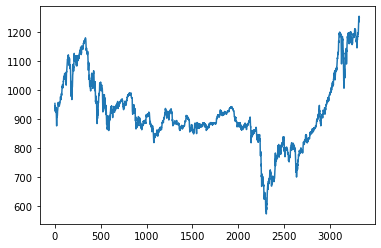

In [50]:
plt.plot(list(prices_train))

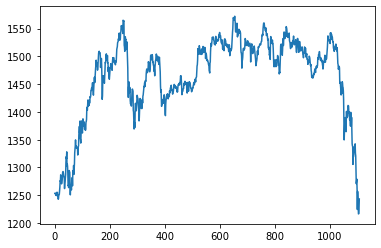

In [52]:
plt.plot(list(prices_validate))

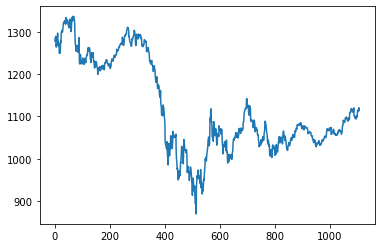

In [53]:
plt.plot(list(prices_test))

In [54]:
print("In the training dataset, y values distribution is:")
print(y_train.value_counts(normalize=True))
print()
print("In the validation dataset, y values distribution is:")
print(y_validate.value_counts(normalize=True))
print()
print("In the test dataset, y values distribution is:")
print(y_test.value_counts(normalize=True))

In the training dataset, y values distribution is:
1.0    0.513538
0.0    0.486462
Name: y_target, dtype: float64

In the validation dataset, y values distribution is:
0.0    0.502708
1.0    0.497292
Name: y_target, dtype: float64

In the test dataset, y values distribution is:
0.0    0.524368
1.0    0.475632
Name: y_target, dtype: float64


## Removing volatility outliers from the training dataset

## Train the XGBoost model with Genetic Algorithm to select the best hyperparams and features

In [55]:
# Define fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Decode the solution to extract selected features, learning rate, and max depth
    selected_features = np.where(solution[:num_features] == 1)[0]
    num_selected_features = len(selected_features)
    # Penalize solutions with no selected features
    if num_selected_features == 0:
        return 0.0  # Return a low fitness score
    
    learning_rate = float(solution[num_features])
    max_depth = int(solution[num_features + 1])
    num_estimators = int(solution[num_features + 2])
    min_child_weight = float(solution[num_features + 3])
    subsample = float(solution[num_features + 4])

    # Define XGBoost hyperparameters
    xgb_params = {
        'objective': 'binary:logistic',
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'n_estimators': num_estimators,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'nthread': 8  # Set the number of threads
    }

    # Train XGBoost with selected features and hyperparameters
    xgb_model = xgb.XGBClassifier(**xgb_params)
    xgb_model.fit(X_train.iloc[:, selected_features], y_train)
    
    # Calculate model performance
    y_pred = xgb_model.predict(X_validate.iloc[:, selected_features])
    score = accuracy_score(y_validate, y_pred)
    
    return score

In [56]:
# Define the number of features and the length of the gene
num_features = X_train.shape[1]
num_genes = num_features + 5  # Features + # Hyperparameters

# Define the gene space (binary for feature selection, continuous for learning rate and max depth)
gene_space = [[0, 1] for _ in range(num_features)] + \
             [{"low": 0.01, "high": 1.0, "step": 0.01},  # Learning rate range
              {"low": 1, "high": 11, "step": 1}, # Max depth range
              {"low": 50, "high": 1000, "step": 50}, # Number of estimators
              {"low": 1, "high": 50, "step": 1}, # Min child weight
              {"low": 0.1, "high": 1.0, "step": 0.1} # Subsample
             ]

def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    best_solution = ga_instance.best_solution()
    print("Fitness of the best solution :", best_solution[1])
    print("Best gene:", best_solution[0])

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=10, num_parents_mating=20, sol_per_pop = 20,
                       fitness_func=fitness_function, num_genes=num_genes, gene_space=gene_space,
                       parent_selection_type='rws',
                       crossover_probability = 0.7, mutation_type = 'random',
                      mutation_percent_genes = 33.3, on_generation = on_gen)

# Run the optimization
ga_instance.run()

Generation :  1
Fitness of the best solution : 0.5433212996389891
Best gene: [0.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00
 1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00
 0.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00
 0.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00
 0.0e+00 0.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 1.0e+00 1.0e+00 0.0e+00 0.0e+00
 1.0e+00 0.0e+00 5.0e-02 9.0e+00 2.5e+02 2.5e+01 8.0e-01]
Generation :  2
Fitness of the best solution : 0.546028880866426
Best gene: [  1.    0.    0.    1.    1.    0.    0.    0.    1.    0.    1.    1.
   0.    0.    0.    1.    1.    1.    1.    0.    0.    0.    1.    1.
   0.    0.    1.    0.    0.    0.    1.    1.    1.    1.  

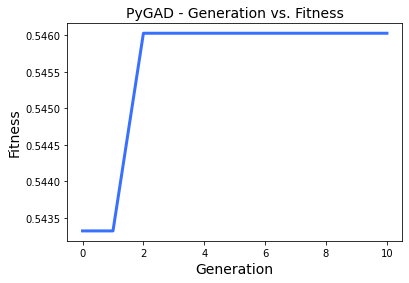

Figure(432x288)


In [57]:
print(ga_instance.plot_fitness())

In [58]:
# Get the best solution after optimization
best_solution = ga_instance.best_solution()

# Decode the best solution to get selected features, best learning rate, and best max depth
selected_features = best_solution[0][:num_features] == 1
best_learning_rate = best_solution[0][num_features]
best_max_depth = int(best_solution[0][num_features + 1])
best_num_estimators = int(best_solution[0][num_features + 2])
min_child_weight = int(best_solution[0][num_features + 3])
subsample = best_solution[0][num_features + 4]

In [59]:
# Train XGBoost with selected features, best learning rate, and best max depth on the full training dataset
xgb_params_best = {
    'learning_rate': best_learning_rate,
    'max_depth': best_max_depth,
    'n_estimators': best_num_estimators,
    'min_child_weight': min_child_weight,
    'subsample': subsample,
}
xgb_model_best = xgb.XGBClassifier(**xgb_params_best)
xgb_model_best.fit(X_train.iloc[:, selected_features], y_train)

print(f"The chosen learning rate is: {best_learning_rate}")
print(f"The chosen max depth is: {best_max_depth}")
print(f"The chosen # of estimators is: {best_num_estimators}")
print(f"The chosen min child weight is: {min_child_weight}")
print(f"The chosen subsample is: {subsample}")

The chosen learning rate is: 0.9
The chosen max depth is: 7
The chosen # of estimators is: 150
The chosen min child weight is: 19
The chosen subsample is: 0.9


In [60]:
# Get feature importance scores
importance_scores = xgb_model_best.get_booster().get_score(importance_type='weight')

# Convert the importance scores dictionary to a DataFrame
importance_df = pd.DataFrame(list(importance_scores.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 Important Features")
importance_df.head(10)

Top 10 Important Features


,Feature,Importance
37,quadrature,96.0
31,adosc,93.0
35,ht_decperiod,79.0
2,volume,76.0
21,mfi,68.0
26,slowk,66.0
38,sine,65.0
24,ppo,63.0
27,slowd,61.0
16,adxr,60.0


## Predict volatility in the test dataset

In [64]:
returns_test = prices_test.pct_change()
returns_test.iloc[0] = 0
volatility_test = returns_test.rolling(window=18*4).std()

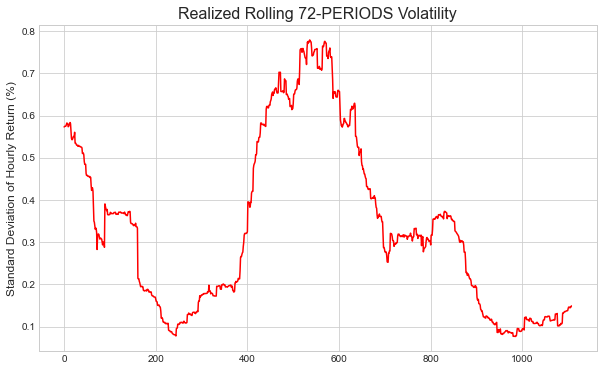

In [65]:
# Visulize the volatility in the test dataset
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(list(X_test['volatility']), color='red')

plt.title('Realized Rolling 72-PERIODS Volatility', fontsize = 16)
plt.ylabel('Standard Deviation of Hourly Return (%)', fontsize=12)
plt.show()

In [66]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [67]:
print(X_test.iloc[0,:]['close'])

0.7056229327453142


In [68]:
test_returns = X_test['close'].pct_change()
test_returns.iloc[0] = X_test.iloc[0,:]['close']

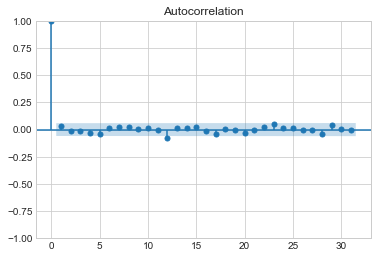

In [69]:
plot_acf(test_returns)
plt.show()

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


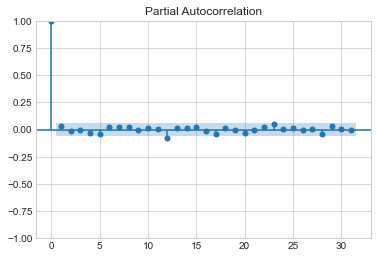

In [70]:
plot_pacf(test_returns)
plt.show()

In [71]:
price_series

time
2017-12-05 14:30:00     954.0
2017-12-06 10:00:00     943.7
2017-12-06 11:00:00     946.3
2017-12-06 13:30:00     936.0
2017-12-06 14:30:00     927.0
                        ...  
2023-06-22 13:30:00    1113.9
2023-06-22 14:30:00    1111.7
2023-06-23 10:00:00    1118.2
2023-06-23 11:00:00    1120.5
2023-06-23 13:30:00    1115.0
Name: close, Length: 5540, dtype: float64

In [72]:
test_size = len(returns_test)
rolling_volatility_pred = []
for i in range(test_size):
    train = df['t1change'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1,rescale=False)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=False)
    rolling_volatility_pred.append(np.sqrt(pred.variance.values[-1,:][0]))

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

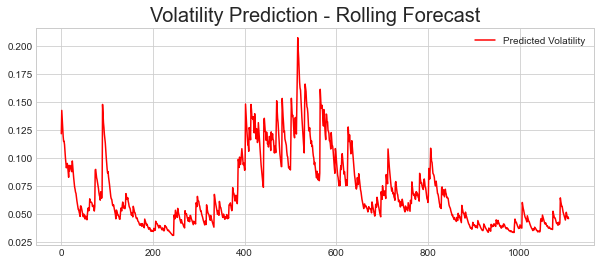

In [74]:
plt.figure(figsize=(10,4))
plt.plot(list(rolling_volatility_pred), color = 'red', label = "Predicted Volatility")
plt.legend()
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)

## Evaluating the XGBoost Model

In [75]:
len(rolling_volatility_pred)

1108

In [76]:
len(X_test)

1108

In [77]:
# Calculate the Z-scores of volatility values for the test dataset
z_scores = (np.array(rolling_volatility_pred) - np.mean(rolling_volatility_pred)) / np.std(rolling_volatility_pred)

# Set a threshold for outlier detection (e.g., z-score > 2 or < -2)
outlier_threshold = 2

# Find indices of outliers
outlier_indices = X_test.index[abs(z_scores) > outlier_threshold]
len(outlier_indices)

58

X_test = X_test.drop(outlier_indices)
y_test = y_test.drop(outlier_indices)

In [152]:
y_pred = xgb_model_best.predict(X_test.iloc[:, selected_features])

accuracy = accuracy_score(y_test, y_pred)
precision = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The accuracy score on the test dataset is: {accuracy}")
print(f"The precision score on the test dataset is: {precision}")
print(f"The recall score on the test dataset is: {recall}")
print(f"The F1 score on the test dataset is: {f1}")

The accuracy score on the test dataset is: 0.5361010830324909
The precision score on the test dataset is: 0.5361010830324909
The recall score on the test dataset is: 0.50853889943074
The F1 score on the test dataset is: 0.5104761904761904


In [153]:
# Explain features' contribution using the SHAP values
explainer = shap.Explainer(xgb_model_best)
shap_values = explainer.shap_values(X_test.iloc[:, selected_features])

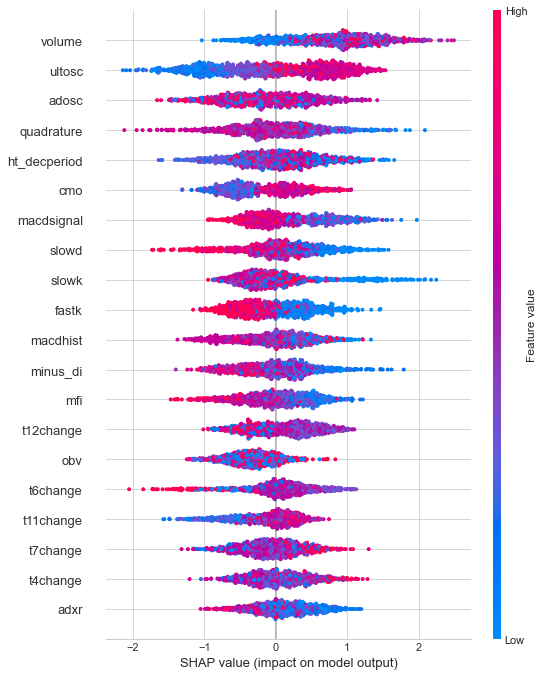

In [154]:
shap.summary_plot(shap_values, X_test.iloc[:, selected_features])

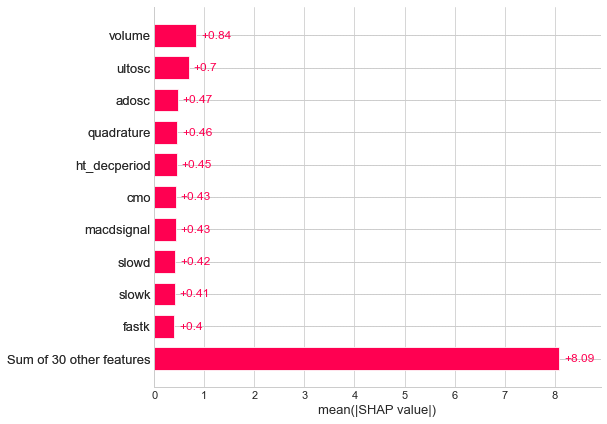

In [794]:
shap.plots.bar(explainer(X_test.iloc[:, selected_features]), max_display = 11)

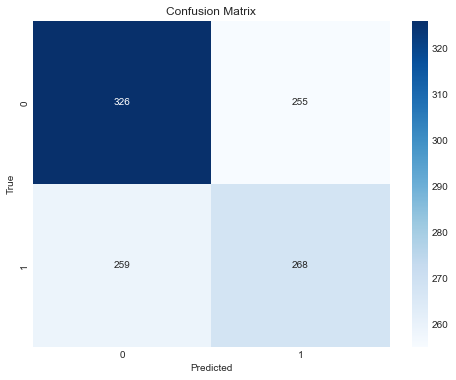

In [607]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = [0, 1]

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Backtesting

In [1]:
# Define trading costs and initial margin
round_trip_cost = 7700
overnight_cost = 2550
tax_rate = 0.0005
init_margin = 0.2

# Define the bet size from Kelly's Formula of f* = (bp - q) / b. Assumes b to be 1.15
bet_size = (1.15 * 0.52 - 0.48) / 1.15
#bet_size = 1

# Create a class with available capital, total portfolio value, action taken, and cumulative profit
class Portfolio:
    def __init__(self, capital=1000000000, portfolio=0, debt=0, contracts = 0, position=0, init_margin = init_margin, cum_profit=0, last_traded = pd.Timestamp("2000-01-01 00:00:00"), purchase_price = 0, last_profit = 0):
        self.nav = capital + portfolio - debt
        self.capital = capital
        self.portfolio = portfolio
        self.debt = debt
        self.contracts = contracts
        self.position = position
        self.init_margin = init_margin
        self.cum_profit = cum_profit
        self.last_traded = last_traded
        self.purchase_price = 0
        self.last_profit = last_profit
        self.cum_trading_costs = 0
    
    def enter_long_position(self, price, date):
        if self.position == 1:
            raise Exception("Already in Long position")
        else:
            contract_price = price * 100000
            num_contract  = math.floor(((self.capital * bet_size) /self.init_margin) / contract_price) # Get number of contracts can long
            contracts_value = contract_price * num_contract
            
            
            #print(f"I have a capital of {self.capital}")
            #print(f"I'm buying a contract value of {contracts_value}")
            
            self.portfolio += contracts_value # Update portfolio
            self.capital -= contracts_value * self.init_margin # Update available capital
            self.debt += contracts_value * (1 - self.init_margin) # Update debt
            self.position = 1 # Update state of action
            self.contracts = num_contract # Update number of contract
            self.last_traded = date # Update date
            self.purchase_price = price # Update purchase price
            
        return None
    
    def enter_short_position(self, price, date):
        if self.position == -1:
            raise Exception("Already in Short position")
        else:
            contract_price = price * 100000
            num_contract = math.floor(((self.capital * bet_size) /self.init_margin) / contract_price) # Get number of contracts can Short
            contracts_value = contract_price * num_contract
                        
            #print(f"I have a capital of {self.capital}")
            #print(f"I'm buying a contract value of {contracts_value}")
            
            self.portfolio += contracts_value # Update portfolio
            self.capital -= contracts_value * self.init_margin # Update available capital
            self.debt += contracts_value * (1 - self.init_margin) # Update debt
            self.position = -1 # Update state of action
            self.contracts = num_contract # Update number of contract
            self.last_traded = date # Update date 
            self.purchase_price = price # Update purchase price
            
        return None
            
    def close_long_position(self, price, date):
        if self.position == 0 or self.position == -1:
            raise Exception("Cannot close a Long position while in Neutral or Short position")
        else:
            trading_cost = self.contracts * round_trip_cost
            overnight_trading_cost = (date - self.last_traded).days * overnight_cost * self.contracts
            tax_cost = self.portfolio * self.init_margin * tax_rate
            
            gross_profit = (price - self.purchase_price) * self.contracts * 100000
            net_profit = gross_profit - trading_cost - overnight_trading_cost - tax_cost

            self.capital += (self.portfolio + net_profit - self.debt)
            self.cum_profit += net_profit
            self.portfolio = 0
            self.debt = 0
            self.position = 0
            self.contracts = 0
            self.last_traded = date
            self.purchase_price = price
            self.last_profit = net_profit
            self.cum_trading_costs += trading_cost + overnight_cost + tax_cost
            
        return None
    
    def close_short_position(self, price, date):
        if self.position == 0 or self.position == 1:
            raise Exception("Cannot close a Short position while in Neutral or Long position")
        else:
            trading_cost = self.contracts * round_trip_cost
            overnight_trading_cost = (date - self.last_traded).days * overnight_cost * self.contracts
            tax_cost = self.portfolio * self.init_margin * tax_rate
            
            gross_profit = (self.purchase_price - price) * self.contracts * 100000
            net_profit = gross_profit - trading_cost - overnight_trading_cost - tax_cost

            self.capital += (self.portfolio + net_profit - self.debt)
            self.cum_profit += net_profit
            self.portfolio = 0
            self.debt = 0
            self.position = 0
            self.contracts = 0
            self.last_traded = date
            self.last_profit = net_profit
            self.cum_trading_costs += trading_cost + overnight_cost + tax_cost
            
        return None
    
    def calculate_nav(self, price):
        portfolio_val = price * 100000 * self.contracts 
        self.nav = self.capital + portfolio_val - self.debt
        return None

NameError: name 'pd' is not defined

In [ ]:
df_test = pd.DataFrame()
df_test = X_test.merge(price_series, left_index = True, right_index = True, how='inner')

In [ ]:
# Cut to where we have selected the data for test and add the predicted y values from above
df_test['y_pred'] = y_pred

In [2]:
portfolio = Portfolio()
actions = [] # Go long (1), go short (-1), or do nothing (0)
values = [] # Total portfolio values
capital = []
debt = []
portfolio_val = []
position = []
last_traded = []
purchase_price = []
profits = []
cum_profits = [] # Cumulative returns

for date, row in df_test.iterrows():
    time = pd.to_datetime(date)
    curr_price = row['close_y']
    
    if portfolio.debt > 0.85 * curr_price * 100000 * portfolio.contracts:
        if portfolio.position == 1:
            portfolio.close_long_position(curr_price, time)
        else:
            portfolio.close_short_position(curr_price, time)
        actions.append(int(0))
        profits.append(portfolio.last_profit)
    
    elif portfolio.position == 0:
        if row['y_pred'] == 1:
            portfolio.enter_long_position(curr_price, time)
            actions.append(int(1))
        else:
            portfolio.enter_short_position(curr_price, time)
            actions.append(int(-1))
        profits.append(portfolio.last_profit)
        
    elif portfolio.position == 1:
        if row['y_pred'] == 1:
            actions.append(int(0))
            profits.append((curr_price - portfolio.purchase_price) * portfolio.contracts * 100000)
        else:
            portfolio.close_long_position(curr_price, time)
            portfolio.enter_short_position(curr_price, time)
            actions.append(int(-1))
            profits.append(portfolio.last_profit)
        
    elif portfolio.position == -1:
        if row['y_pred'] == 1:
            portfolio.close_short_position(curr_price, time)
            portfolio.enter_long_position(curr_price, time)
            actions.append(int(1))
            profits.append(portfolio.last_profit)
        else:
            actions.append(int(0))
            profits.append((portfolio.purchase_price - curr_price) * portfolio.contracts * 100000)
            
    portfolio.calculate_nav(curr_price)
    
    values.append(portfolio.nav)
    capital.append(portfolio.capital)
    debt.append(portfolio.debt)
    portfolio_val.append(portfolio.portfolio)
    position.append(portfolio.position)
    last_traded.append(portfolio.last_traded)
    purchase_price.append(portfolio.purchase_price)
    cum_profits.append(portfolio.cum_profit)

NameError: name 'Portfolio' is not defined

In [3]:
df_results = pd.DataFrame()

NameError: name 'pd' is not defined

In [4]:
df_results['close'] = df_test['close_y']
df_results['y_target'] = y_test.to_list()
df_results['y_pred'] = y_pred
df_results['actions'] = actions
df_results["total_value"] = values
df_results['capital'] = capital
df_results['debt'] = debt
df_results['portfolio_val'] = portfolio_val
df_results['position'] = position
df_results['last_traded'] = last_traded
df_results['purchase_price'] = purchase_price 
df_results['cum_profit'] = cum_profits
df_results['profit'] = profits
df_results['returns'] = df_results['total_value'].pct_change()
df_results['cum_returns'] = (1 + df_results['returns']).cumprod() - 1

NameError: name 'df_test' is not defined

In [5]:
df_results

NameError: name 'df_results' is not defined

## Combining with Risk-Free Rate Data

In [732]:
rf_rates = pd.read_csv(f'bond_yields.csv')

In [733]:
rf_rates['date'] = pd.to_datetime(rf_rates['date'])
rf_rates = rf_rates.set_index('date')
rf_rates = rf_rates['price'] / 100
rf_rates = rf_rates.sort_index()

In [734]:
rf_rates

date
2017-08-01    0.05272
2017-08-02    0.05272
2017-08-03    0.05272
2017-08-04    0.05272
2017-08-06    0.05272
               ...   
2023-08-25    0.02662
2023-08-28    0.02708
2023-08-29    0.02735
2023-08-30    0.02751
2023-08-31    0.02667
Name: price, Length: 1593, dtype: float64

In [735]:
dates =pd.DatetimeIndex(df_results.index)

In [736]:
df_results = df_results.set_index(dates)

In [737]:
df_results = pd.merge_asof(df_results, rf_rates, left_index = True, right_index = True)

In [738]:
df_results.rename(columns= {'price': 'risk_free_rate'}, inplace=True)

## Output Results

In [739]:
results =  {}

In [782]:
results['Number of Periods'] = round(len(df_results), 0)
results['Bet Size'] = bet_size
results['Test Accuracy %'] =round(accuracy * 100, 3)
results['Test Precision %'] = round(precision * 100, 3)
results['Test Recall %'] = round(recall * 100, 3)
results['Test F1 %'] = round(f1 * 100, 3)

In [783]:
results['Long Positions'] = round(len(df_results[df_results['actions']== 1]) / len(df_results), 3)
results['Short Positions'] = round(len(df_results[df_results['actions']== -1]) / len(df_results), 3)

In [784]:
results['Cumulative Returns %'] = round(df_results['cum_returns'][-1] * 100, 3)
results['Avg Returns %'] = round(df_results['returns'].mean() * 100, 3)
results['Avg Returns Std %'] = round(df_results['returns'].std() * 100, 3)

In [785]:
# Calculating the SHarpe Ratio
rf_hourly = (1 + df_results['risk_free_rate']) ** (1/(365*24)) - 1
df_results['excess_ret'] = df_results['returns'] - rf_hourly

yearly_trading_hours = 252 * 4
annualized_avg_ret = (1 + df_results['excess_ret'].mean()) ** yearly_trading_hours - 1
annualized_std = df_results['excess_ret'].std() * np.sqrt(yearly_trading_hours)
results['Annual Sharpe Ratio:'] = round(annualized_avg_ret / annualized_std, 3)

In [786]:
# Calculating Max Drawdown
# Calculate the peak value (highest point) of the cumulative returns
peak_value = df_results['cum_returns'].expanding().max()

# Calculate the drawdown (percentage decline from the peak value)
drawdown = (df_results['cum_returns'] - peak_value) * 100

# Calculate the maximum drawdown
max_drawdown = - drawdown.min()
results["Max Drawdown %"] = round(max_drawdown, 3)

In [787]:
# Calculating Win Ratio which equals Number of Winning Trades over Total Trades
# Getting the indices where trades happen
long_indices = df_results.index[(df_results['actions'].shift(1).isin([1,0])) & (df_results['actions'] == -1)]
short_indices = df_results.index[(df_results['actions'].shift(1).isin([-1,0])) & (df_results['actions'] == 1)]

# Getting the sums of profits for each trade
long_profit_sums = df_results.loc[long_indices, 'profit'].cumsum()
short_profit_sums = df_results.loc[short_indices, 'profit'].cumsum()

# Getting number of trades where we make vs. losing money
positive_long_trades = len(long_profit_sums[long_profit_sums > 0])
positive_short_trades = len(short_profit_sums[short_profit_sums > 0])

In [788]:
results["Win Ratio"] = round((positive_long_trades + positive_short_trades) / (len(long_profit_sums) + len(short_profit_sums)), 3)
results["Long Win Ratio"] = round(positive_long_trades / len(long_profit_sums), 3)
results['Short Win Ratio'] = round(positive_short_trades / len(short_profit_sums), 3)

results['Avg Long Returns %'] = round(df_results.loc[long_indices, 'returns'].mean() * 100, 3)
results['Avg Short Returns %'] = round(df_results.loc[short_indices, 'returns'].mean() * 100, 3)

In [789]:
# Calculate Long and Short holding periods
long_periods = []
short_periods = []

# Get Long periods
count = 0
for val in df_results['position']:
    if val == 1:
        count += 1
    elif val == -1 or val == 0:
        if count != 0:
            long_periods.append(count)
        count = 0

# Get Short periods
count = 0
for val in df_results['position']:
    if val == -1:
        count += 1
    elif val == 1 or val == 0:
        if count != 0:
            short_periods.append(count)
        count = 0

In [790]:
results['Avg Long Holding Period'] = round(sum(long_periods) / len(long_periods), 3)
results['Avg SHort Holding Period'] = round(sum(short_periods) / len(short_periods), 3)
results['Max Long Holding Period'] = round(max(long_periods), 3)
results['Max Short Holding Period'] = round(max(short_periods), 3)

In [791]:
# Calculate how much of the invested capital was trading costs
results['Pct of Trading Costs'] = round(portfolio.cum_trading_costs / df_results['total_value'][0] * 100, 3)

In [792]:
avg_win_profits = df_results[df_results['profit'] > 0]['profit'].mean()
avg_loss_profits = df_results[df_results['profit'] <= 0]['profit'].mean()

results['Avg Win Payout'] = round(abs(avg_win_profits / avg_loss_profits), 3)

In [793]:
print(pd.DataFrame.from_dict(results, orient='index', columns=['Result Values']))

                          Result Values
Number of Periods           1108.000000
Test Accuracy %               53.610000
Test Precision %              53.610000
Test Recall %                 50.854000
Test F1 %                     51.048000
Long Positions                 0.180000
Short Positions                0.181000
Cumulative Returns %          24.575000
Avg Returns %                  0.021000
Avg Returns Std %              0.570000
Annual Sharpe Ratio:           1.303000
Max Drawdown %                 8.195000
Win Ratio                      0.737000
Long Win Ratio                 0.760000
Short Win Ratio                0.714000
Avg Long Returns %             0.050000
Avg Short Returns %            0.069000
Avg Long Holding Period        2.618000
Avg SHort Holding Period       2.895000
Max Long Holding Period       13.000000
Max Short Holding Period      13.000000
Pct of Trading Costs           3.549000
Avg Win Payout                 1.070000
Bet Size                       0.102609


## Visualizing the results

In [757]:
%matplotlib inline

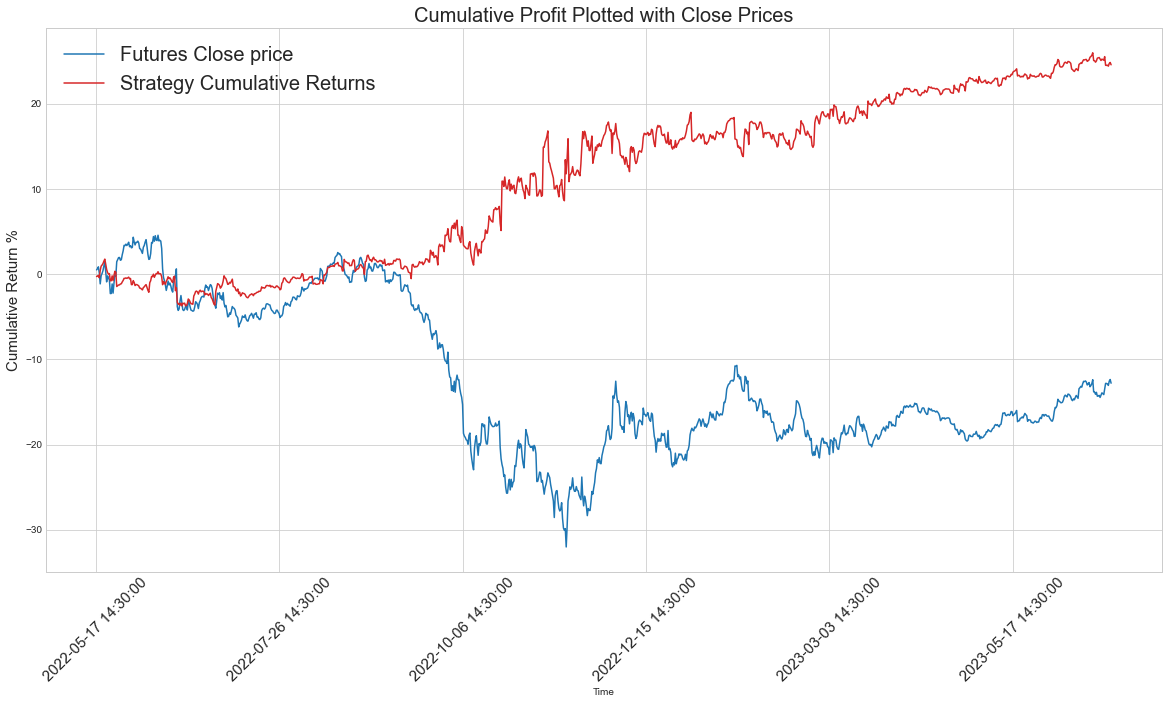

In [758]:
close_pct_change = df_test['close_y'].pct_change()
cum_close_pct_change = (1 + close_pct_change).cumprod() - 1

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 10))

plt.plot(df_test.index, cum_close_pct_change * 100, color='tab:blue', label='Futures Close price')
plt.plot(df_test.index, df_results['cum_returns'] * 100, color='tab:red', label='Strategy Cumulative Returns')
plt.ylabel('Cumulative Return %', fontsize = 15)

plt.xlabel('Time')
x_ticks_indices = range(0, len(df_test), 200)
x_ticks = df_test.index[x_ticks_indices]
plt.xticks(x_ticks, rotation=45, fontsize=15)

# Set the title
plt.title('Cumulative Profit Plotted with Close Prices', fontsize = 20)

# Show the graph
plt.legend(fontsize = 20)
plt.show()

In [763]:
market_rets = df_test['close_y'].pct_change()
market_volatility = market_rets.rolling(window=20).std()

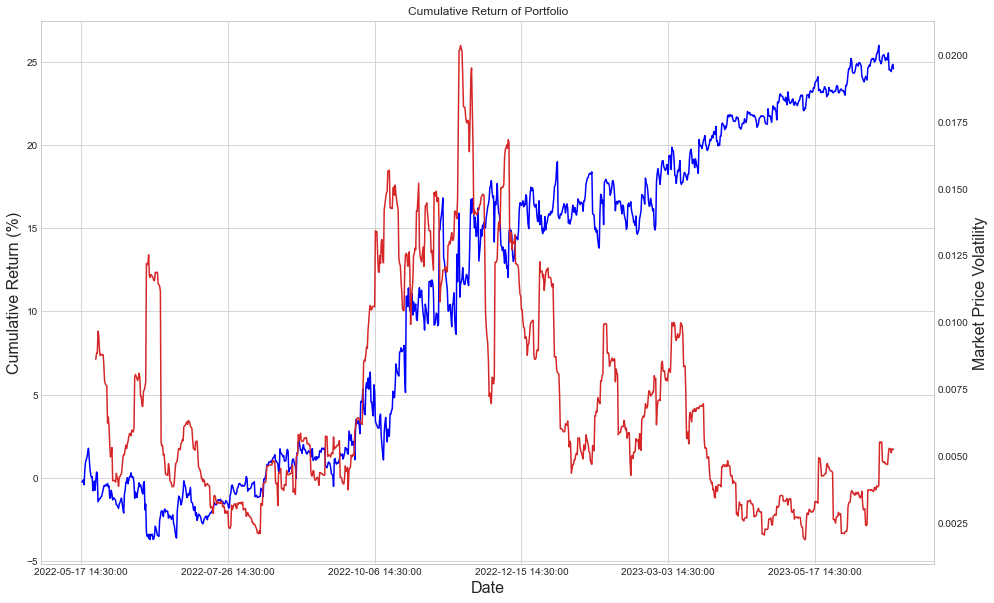

In [768]:
# Plot cumulative return
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(16, 10))
plt.plot(df_test.index, df_results['cum_returns'] * 100, color='blue')
plt.title('Cumulative Return of Portfolio')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Return (%)', fontsize=16)

# Create a twin axes for the second line chart
ax2 = ax1.twinx()

ax2.plot(market_volatility, color='tab:red', label='Market Price Volatility')
ax2.set_ylabel('Market Price Volatility', fontsize=16)


# Format date ticks to show only month and year
x_ticks_indices = range(0, len(df_test), 200)
x_ticks = df_test.index[x_ticks_indices]
plt.xticks(x_ticks, rotation=45, fontsize=16)

plt.grid()
plt.show()

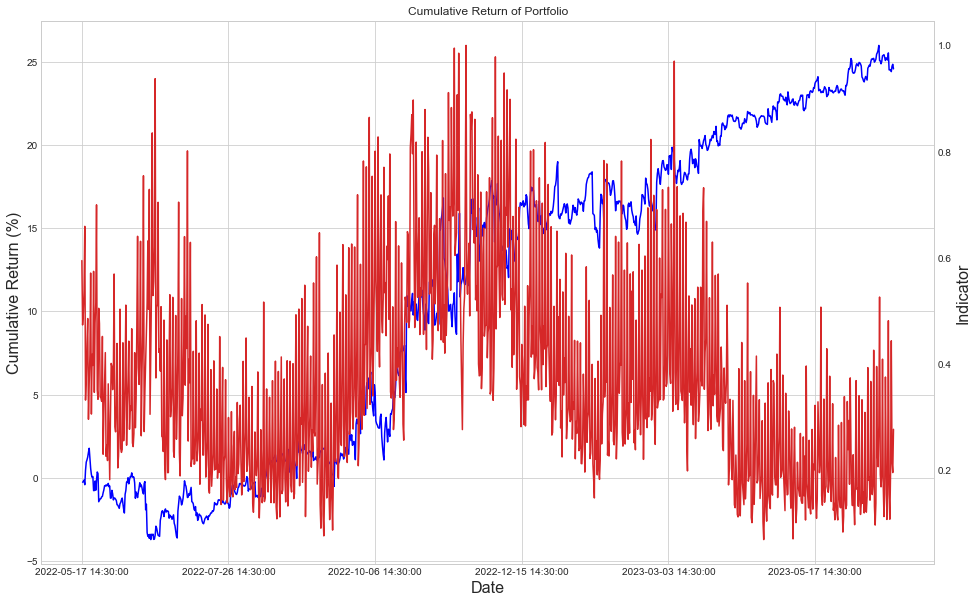

In [778]:
# Plot cumulative return
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots(figsize=(16, 10))
plt.plot(df_test.index, df_results['cum_returns'] * 100, color='blue')
plt.title('Cumulative Return of Portfolio')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Return (%)', fontsize=16)

# Create a twin axes for the second line chart
ax2 = ax1.twinx()

ax2.plot(X_test['volume'], color='tab:red', label='ULTOSC')
ax2.set_ylabel('Indicator', fontsize=16)


# Format date ticks to show only month and year
x_ticks_indices = range(0, len(df_test), 200)
x_ticks = df_test.index[x_ticks_indices]
plt.xticks(x_ticks, rotation=45, fontsize=16)

plt.grid()
plt.show()

time
2022-05-17 14:30:00    0.530870
2022-05-18 10:00:00    0.600595
2022-05-18 11:00:00    0.694744
2022-05-18 13:30:00    0.757061
2022-05-18 14:30:00    0.703999
                         ...   
2023-06-22 13:30:00    0.771241
2023-06-22 14:30:00    0.699203
2023-06-23 10:00:00    0.763305
2023-06-23 11:00:00    0.811215
2023-06-23 13:30:00    0.654186
Name: ultosc, Length: 1108, dtype: float64